# Nextclade Data Preprocessing Notebook 
Topic: ***SARS-CoV-2 Clade Identifier using SNP Data with Machine Learning***

This notebook was used for **preprocessing and initial analysis** the outputs of the Nextclade CLI: `nextclade.tsv`

August 2021

### Import Libraries for analysis and visualization 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Import the output of Clade Assignment tool (Nextclade) : `nextclade.tsv`

![](photos/Nextclade.PNG)

[Nextclade v1.5.4](https://clades.nextstrain.org/) CLI outputs a tsv file after processing

In [2]:
df=pd.read_csv('nextclade.tsv', sep='\t')

D:\Program Files - Data Drive\Anaconda 3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (36,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Initial Exploaration of `nextclade.tsv` 

In [3]:
df

,seqName,clade,qc.overallScore,qc.overallStatus,totalSubstitutions,totalDeletions,totalInsertions,totalAminoacidSubstitutions,totalAminoacidDeletions,totalMissing,...,qc.snpClusters.totalSNPs,qc.frameShifts.frameShifts,qc.frameShifts.totalFrameShifts,qc.frameShifts.score,qc.frameShifts.status,qc.stopCodons.stopCodons,qc.stopCodons.totalStopCodons,qc.stopCodons.score,qc.stopCodons.status,errors
0,BS000685.1 Severe acute respiratory syndrome c...,20B,1.000000,good,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,good,NaN,0.0,0.0,good,NaN
1,BS000686.1 Severe acute respiratory syndrome c...,20B,0.000000,good,10.0,0.0,0.0,0.0,0.0,1.0,...,0.0,NaN,0.0,0.0,good,NaN,0.0,0.0,good,NaN
2,BS000687.1 Severe acute respiratory syndrome c...,20B,1.000000,good,10.0,0.0,0.0,0.0,0.0,25.0,...,0.0,NaN,0.0,0.0,good,NaN,0.0,0.0,good,NaN
3,BS000688.1 Severe acute respiratory syndrome c...,20B,1.000000,good,9.0,0.0,0.0,0.0,0.0,218.0,...,0.0,NaN,0.0,0.0,good,NaN,0.0,0.0,good,NaN
4,BS000689.1 Severe acute respiratory syndrome c...,20B,0.000000,good,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,good,NaN,0.0,0.0,good,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422078,OU535152.1 Severe acute respiratory syndrome c...,21A (Delta),9.000000,good,36.0,41.0,0.0,0.0,0.0,106.0,...,0.0,NaN,0.0,0.0,good,NaN,0.0,0.0,good,NaN
422079,OU535156.1 Severe acute respiratory syndrome c...,21A (Delta),59.062071,mediocre,32.0,7.0,0.0,0.0,0.0,2375.0,...,0.0,NaN,0.0,0.0,good,NaN,0.0,0.0,good,NaN
422080,OU535157.1 Severe acute respiratory syndrome c...,21A (Delta),140.716722,bad,31.0,7.0,0.0,0.0,0.0,3457.0,...,0.0,NaN,0.0,0.0,good,NaN,0.0,0.0,good,NaN
422081,OU535158.1 Severe acute respiratory syndrome c...,21A (Delta),1.000000,good,36.0,13.0,0.0,0.0,0.0,39.0,...,0.0,NaN,0.0,0.0,good,NaN,0.0,0.0,good,NaN


### Get the seqName and Clade only to separate DataFrame

In [4]:
clade=df[['seqName','clade']]
clade.head(20)

,seqName,clade
0,BS000685.1 Severe acute respiratory syndrome c...,20B
1,BS000686.1 Severe acute respiratory syndrome c...,20B
2,BS000687.1 Severe acute respiratory syndrome c...,20B
3,BS000688.1 Severe acute respiratory syndrome c...,20B
4,BS000689.1 Severe acute respiratory syndrome c...,20B
5,BS000691.1 Severe acute respiratory syndrome c...,20B
6,BS000690.1 Severe acute respiratory syndrome c...,20B
7,BS000693.1 Severe acute respiratory syndrome c...,20B
8,BS000692.1 Severe acute respiratory syndrome c...,20B
9,BS000695.1 Severe acute respiratory syndrome c...,20B


In [5]:
clade.loc[clade['clade']=='20H (Beta, V2)']

,seqName,clade
813,FR993761.1 Severe acute respiratory syndrome c...,"20H (Beta, V2)"
823,FR993772.1 Severe acute respiratory syndrome c...,"20H (Beta, V2)"
7846,HG999935.1 Severe acute respiratory syndrome c...,"20H (Beta, V2)"
7848,HG999939.1 Severe acute respiratory syndrome c...,"20H (Beta, V2)"
48934,MW580244.1 Severe acute respiratory syndrome c...,"20H (Beta, V2)"
...,...,...
414878,OU475395.1 Severe acute respiratory syndrome c...,"20H (Beta, V2)"
414936,OU475453.1 Severe acute respiratory syndrome c...,"20H (Beta, V2)"
415026,OU475544.1 Severe acute respiratory syndrome c...,"20H (Beta, V2)"
415519,OU476036.1 Severe acute respiratory syndrome c...,"20H (Beta, V2)"


In [6]:
clade.loc[clade['clade']=='20I (Alpha, V1)']

,seqName,clade
352,BS001035.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)"
358,BS001043.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)"
370,BS001059.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)"
385,BS001070.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)"
392,BS001079.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)"
...,...,...
422050,OU535117.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)"
422055,OU535123.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)"
422059,OU535129.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)"
422071,OU535144.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)"


### Unique Clades found in the Dataset

In [7]:
len(df['clade'].unique())

21

In [8]:
print(df['clade'].unique())

['20B' '19A' '20C' '20G' '20A' '20I (Alpha, V1)' '20E (EU1)' '20D' '19B'
 '20H (Beta, V2)' '21B (Kappa)' '21A (Delta)' nan '20F' '21C (Epsilon)'
 '20J (Gamma, V3)' '21D (Eta)' '21G (Lambda)' '21F (Iota)' '21H'
 '21E (Theta)']


### Removal of Sequences without clade assignment

In [9]:
#19 seqeuences
clade.loc[clade['clade'].isna()]

,seqName,clade
8438,LR878026.1 Severe acute respiratory syndrome c...,NaN
8644,LR878231.1 Severe acute respiratory syndrome c...,NaN
8668,LR878257.1 Severe acute respiratory syndrome c...,NaN
8710,LR878299.1 Severe acute respiratory syndrome c...,NaN
8796,LR883035.1 Severe acute respiratory syndrome c...,NaN
8800,LR883039.1 Severe acute respiratory syndrome c...,NaN
9085,LR883329.1 Severe acute respiratory syndrome c...,NaN
9089,LR883335.1 Severe acute respiratory syndrome c...,NaN
9125,LR883370.1 Severe acute respiratory syndrome c...,NaN
9127,LR883373.1 Severe acute respiratory syndrome c...,NaN


In [10]:
df.iloc[8438]['errors']

'Unable to align: too many insertions, deletions, duplications, or ambiguous seed matches'

In [11]:
df.iloc[8644]['errors']

'Unable to align: too many insertions, deletions, duplications, or ambiguous seed matches'

In [12]:
empty_clade_indexes= clade.loc[clade['clade'].isna()].index
empty_clade_indexes

Int64Index([  8438,   8644,   8668,   8710,   8796,   8800,   9085,   9089,
              9125,   9127,   9257,   9310,   9426,  58168,  58171,  58173,
            136840, 210027, 214529],
           dtype='int64')

In [13]:
clade.drop(empty_clade_indexes, inplace=True)

D:\Program Files - Data Drive\Anaconda 3\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
clade.iloc[8438]

seqName    LR878015.1 Severe acute respiratory syndrome c...
clade                                                    20A
Name: 8439, dtype: object

### Visaulization the Clade Distribution of the dataset using `Matplotlib`

<AxesSubplot:title={'center':'Clade Distribution in NCBI Dataset (Complete Sequences and Removed NaN clades)'}, xlabel='clade', ylabel='counts'>

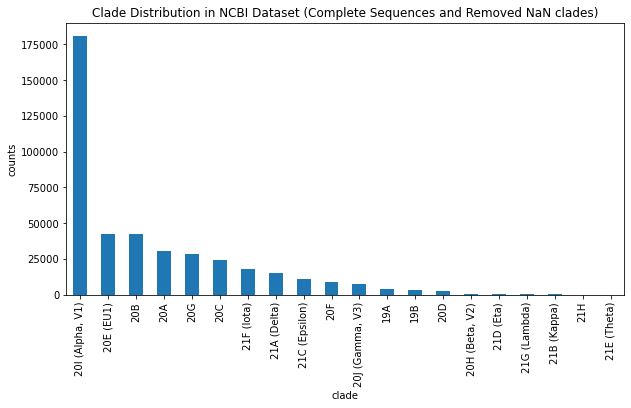

In [15]:
clade['clade'].value_counts().plot(
    kind='bar',
    xlabel='clade',
    ylabel='counts',
    title='Clade Distribution in NCBI Dataset (Complete Sequences and Removed NaN clades)',
    figsize=(10,5),
    )

### Value per each clade

In [16]:
clade['clade'].value_counts()

20I (Alpha, V1)    181087
20E (EU1)           42625
20B                 42456
20A                 30656
20G                 28652
20C                 24485
21F (Iota)          17752
21A (Delta)         15129
21C (Epsilon)       11069
20F                  9122
20J (Gamma, V3)      7471
19A                  4094
19B                  3410
20D                  2377
20H (Beta, V2)        566
21D (Eta)             557
21G (Lambda)          342
21B (Kappa)           177
21H                    29
21E (Theta)             8
Name: clade, dtype: int64

### Balance Clade distribution by decreasing 20I (Alpha Variant) clades

In [17]:
alpha=clade.loc[clade['clade']=='20I (Alpha, V1)']
alpha=alpha[:50000]
alpha

,seqName,clade
352,BS001035.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)"
358,BS001043.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)"
370,BS001059.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)"
385,BS001070.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)"
392,BS001079.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)"
...,...,...
159785,MZ207316.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)"
159786,MZ207317.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)"
159789,MZ207329.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)"
159791,MZ207334.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)"


In [18]:
alpha_indexes=clade.loc[clade['clade']=='20I (Alpha, V1)'].index
clade.drop(alpha_indexes,inplace=True)
clade

D:\Program Files - Data Drive\Anaconda 3\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,seqName,clade
0,BS000685.1 Severe acute respiratory syndrome c...,20B
1,BS000686.1 Severe acute respiratory syndrome c...,20B
2,BS000687.1 Severe acute respiratory syndrome c...,20B
3,BS000688.1 Severe acute respiratory syndrome c...,20B
4,BS000689.1 Severe acute respiratory syndrome c...,20B
...,...,...
422077,OU535154.1 Severe acute respiratory syndrome c...,21A (Delta)
422078,OU535152.1 Severe acute respiratory syndrome c...,21A (Delta)
422079,OU535156.1 Severe acute respiratory syndrome c...,21A (Delta)
422080,OU535157.1 Severe acute respiratory syndrome c...,21A (Delta)


In [19]:
clade=clade.append(alpha)
clade

,seqName,clade
0,BS000685.1 Severe acute respiratory syndrome c...,20B
1,BS000686.1 Severe acute respiratory syndrome c...,20B
2,BS000687.1 Severe acute respiratory syndrome c...,20B
3,BS000688.1 Severe acute respiratory syndrome c...,20B
4,BS000689.1 Severe acute respiratory syndrome c...,20B
...,...,...
159785,MZ207316.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)"
159786,MZ207317.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)"
159789,MZ207329.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)"
159791,MZ207334.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)"


<AxesSubplot:title={'center':'Clade Distribution in NCBI Dataset (Adjusted for even sampling)'}, xlabel='clade', ylabel='counts'>

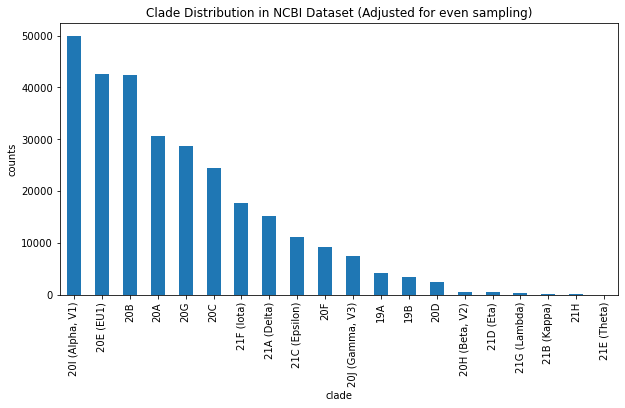

In [20]:
clade['clade'].value_counts().plot(
    kind='bar',
    xlabel='clade',
    ylabel='counts',
    title='Clade Distribution in NCBI Dataset (Adjusted for even sampling)',
    figsize=(10,5),
    )


In [21]:
clade['clade'].value_counts()

20I (Alpha, V1)    50000
20E (EU1)          42625
20B                42456
20A                30656
20G                28652
20C                24485
21F (Iota)         17752
21A (Delta)        15129
21C (Epsilon)      11069
20F                 9122
20J (Gamma, V3)     7471
19A                 4094
19B                 3410
20D                 2377
20H (Beta, V2)       566
21D (Eta)            557
21G (Lambda)         342
21B (Kappa)          177
21H                   29
21E (Theta)            8
Name: clade, dtype: int64

In [22]:
print('Original number of sequences: ' + str(len(df['seqName'].unique())))
print('Filtered (Decrease of Alpha Sequences, and removal of NaN clades) number of sequences: ' + str(len(clade['seqName'].unique())))
print('Sequences removed: ' + str(len(df['seqName'].unique())-len(clade['seqName'].unique())))

Original number of sequences: 422083
Filtered (Decrease of Alpha Sequences, and removal of NaN clades) number of sequences: 290977
Sequences removed: 131106


## Parsing the metadata from the FASTA header of sequences

### Get the accession number for merging with numcer output 

In [23]:
clade['seqName']

0         BS000685.1 Severe acute respiratory syndrome c...
1         BS000686.1 Severe acute respiratory syndrome c...
2         BS000687.1 Severe acute respiratory syndrome c...
3         BS000688.1 Severe acute respiratory syndrome c...
4         BS000689.1 Severe acute respiratory syndrome c...
                                ...                        
159785    MZ207316.1 Severe acute respiratory syndrome c...
159786    MZ207317.1 Severe acute respiratory syndrome c...
159789    MZ207329.1 Severe acute respiratory syndrome c...
159791    MZ207334.1 Severe acute respiratory syndrome c...
159792    MZ207325.1 Severe acute respiratory syndrome c...
Name: seqName, Length: 290977, dtype: object

In [24]:
sequence_id=clade['seqName'].str.split(pat=' ',expand=True)
sequence_id

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,BS000685.1,Severe,acute,respiratory,syndrome,coronavirus,2,hCoV-19/Japan/Donner1/2020,"RNA,",complete,...,None,None,None,None,None,None,None,None,None,None
1,BS000686.1,Severe,acute,respiratory,syndrome,coronavirus,2,hCoV-19/Japan/Donner2/2020,"RNA,",complete,...,None,None,None,None,None,None,None,None,None,None
2,BS000687.1,Severe,acute,respiratory,syndrome,coronavirus,2,hCoV-19/Japan/Donner3/2020,"RNA,",nearly,...,None,None,None,None,None,None,None,None,None,None
3,BS000688.1,Severe,acute,respiratory,syndrome,coronavirus,2,hCoV-19/Japan/Donner4/2020,"RNA,",nearly,...,None,None,None,None,None,None,None,None,None,None
4,BS000689.1,Severe,acute,respiratory,syndrome,coronavirus,2,hCoV-19/Japan/Donner6/2020,"RNA,",complete,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159785,MZ207316.1,Severe,acute,respiratory,syndrome,coronavirus,2,isolate,SARS-CoV-2/human/USA/MA-CDCBI-CRSP_4HCEDTNGZ7V...,complete,...,None,None,None,None,None,None,None,None,None,None
159786,MZ207317.1,Severe,acute,respiratory,syndrome,coronavirus,2,isolate,SARS-CoV-2/human/USA/MA-CDCBI-CRSP_4HFTZQNTXPT...,complete,...,None,None,None,None,None,None,None,None,None,None
159789,MZ207329.1,Severe,acute,respiratory,syndrome,coronavirus,2,isolate,SARS-CoV-2/human/USA/MA-CDCBI-CRSP_5AFI5MVLITS...,complete,...,None,None,None,None,None,None,None,None,None,None
159791,MZ207334.1,Severe,acute,respiratory,syndrome,coronavirus,2,isolate,SARS-CoV-2/human/USA/MA-CDCBI-CRSP_5JBA3I6ED76...,complete,...,None,None,None,None,None,None,None,None,None,None


Get the first column only which contains the accession number

In [25]:
sequence_id=sequence_id[0]

Add Accession id to clade assignment output 

In [26]:
clade['sequence_id']=sequence_id
clade

,seqName,clade,sequence_id
0,BS000685.1 Severe acute respiratory syndrome c...,20B,BS000685.1
1,BS000686.1 Severe acute respiratory syndrome c...,20B,BS000686.1
2,BS000687.1 Severe acute respiratory syndrome c...,20B,BS000687.1
3,BS000688.1 Severe acute respiratory syndrome c...,20B,BS000688.1
4,BS000689.1 Severe acute respiratory syndrome c...,20B,BS000689.1
...,...,...,...
159785,MZ207316.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)",MZ207316.1
159786,MZ207317.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)",MZ207317.1
159789,MZ207329.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)",MZ207329.1
159791,MZ207334.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)",MZ207334.1


In [27]:
#clade.drop(['seqName'],axis=1,inplace=True)
clade

,seqName,clade,sequence_id
0,BS000685.1 Severe acute respiratory syndrome c...,20B,BS000685.1
1,BS000686.1 Severe acute respiratory syndrome c...,20B,BS000686.1
2,BS000687.1 Severe acute respiratory syndrome c...,20B,BS000687.1
3,BS000688.1 Severe acute respiratory syndrome c...,20B,BS000688.1
4,BS000689.1 Severe acute respiratory syndrome c...,20B,BS000689.1
...,...,...,...
159785,MZ207316.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)",MZ207316.1
159786,MZ207317.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)",MZ207317.1
159789,MZ207329.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)",MZ207329.1
159791,MZ207334.1 Severe acute respiratory syndrome c...,"20I (Alpha, V1)",MZ207334.1


### Further processing of metadata

In [28]:
metadata=clade['seqName'].str.split(pat='/',expand=True)
metadata.head()

,0,1,2,3,4
0,BS000685.1 Severe acute respiratory syndrome c...,Japan,Donner1,"2020 RNA, complete genome",None
1,BS000686.1 Severe acute respiratory syndrome c...,Japan,Donner2,"2020 RNA, complete genome",None
2,BS000687.1 Severe acute respiratory syndrome c...,Japan,Donner3,"2020 RNA, nearly complete genome",None
3,BS000688.1 Severe acute respiratory syndrome c...,Japan,Donner4,"2020 RNA, nearly complete genome",None
4,BS000689.1 Severe acute respiratory syndrome c...,Japan,Donner6,"2020 RNA, complete genome",None


In [29]:
metadata[2]

0         Donner1
1         Donner2
2         Donner3
3         Donner4
4         Donner6
           ...   
159785        USA
159786        USA
159789        USA
159791        USA
159792        USA
Name: 2, Length: 290977, dtype: object

In [30]:
countries=metadata[2].value_counts()
countries[:30]

USA       171505
AUS         9926
IND         1024
EGY          755
BGD          428
NZL          375
CHL          286
PAK          235
HKG          203
BHR          176
GHA          167
POL          154
SRB          146
CHN          144
ESP          132
PER          120
ISR          120
ITA          112
GRC           97
AUT           97
MEX           96
DEU           86
IRQ           82
France        80
SWE           72
DJI           63
SAU           60
TUN           58
SLE           57
TWN           56
Name: 2, dtype: int64

<AxesSubplot:title={'center':'Countries of Origin of SARS-CoV-2 (With label and filtered)'}, ylabel='2'>

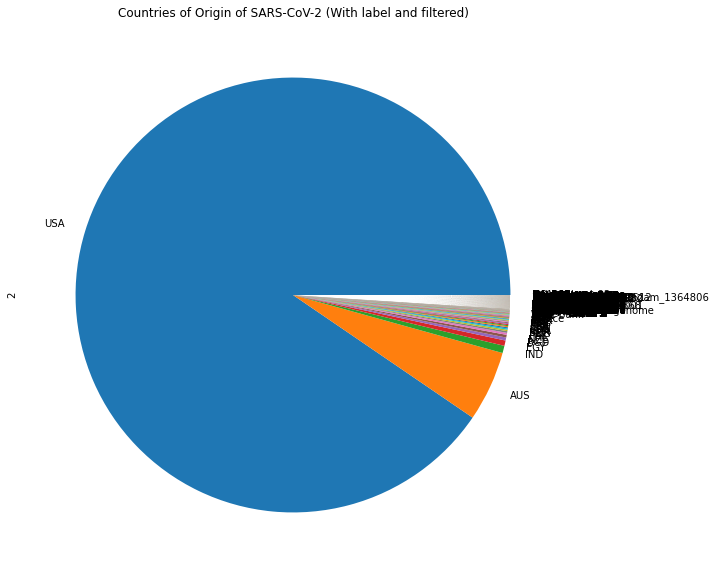

In [31]:
countries.plot(kind='pie',
               figsize=(10,10),
               title='Countries of Origin of SARS-CoV-2 (With label and filtered)')

<AxesSubplot:title={'center':'Countries of Origin of SARS-CoV-2 (Without USA and without label)'}, ylabel='2'>

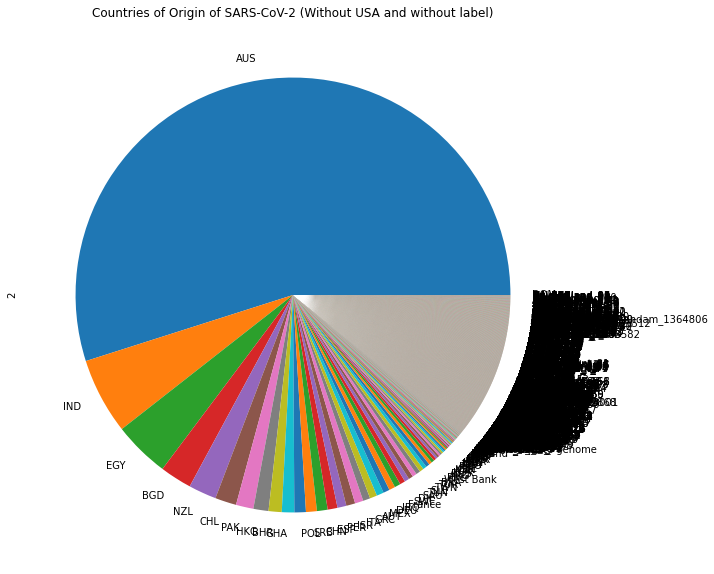

In [32]:
countries[1:].plot(kind='pie',
               figsize=(10,10),
               title='Countries of Origin of SARS-CoV-2 (Without USA and without label)')

## Export filtered clade assignment output

In [33]:
clade.drop(['seqName'],axis=1,inplace=True)

In [34]:
clade.to_csv('filteredcladeassignment.csv',index=False)